In [1]:
from helper import *
from scipy import ndimage as ndi

%matplotlib inline

from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from skimage.filters import sobel
from skimage.exposure import histogram
from skimage.color import label2rgb



In [2]:
# import image
band_cont = get_band_con(open('data/Band Contrast 223.csv'))

Text(0.5, 1.0, 'histogram of gray values')

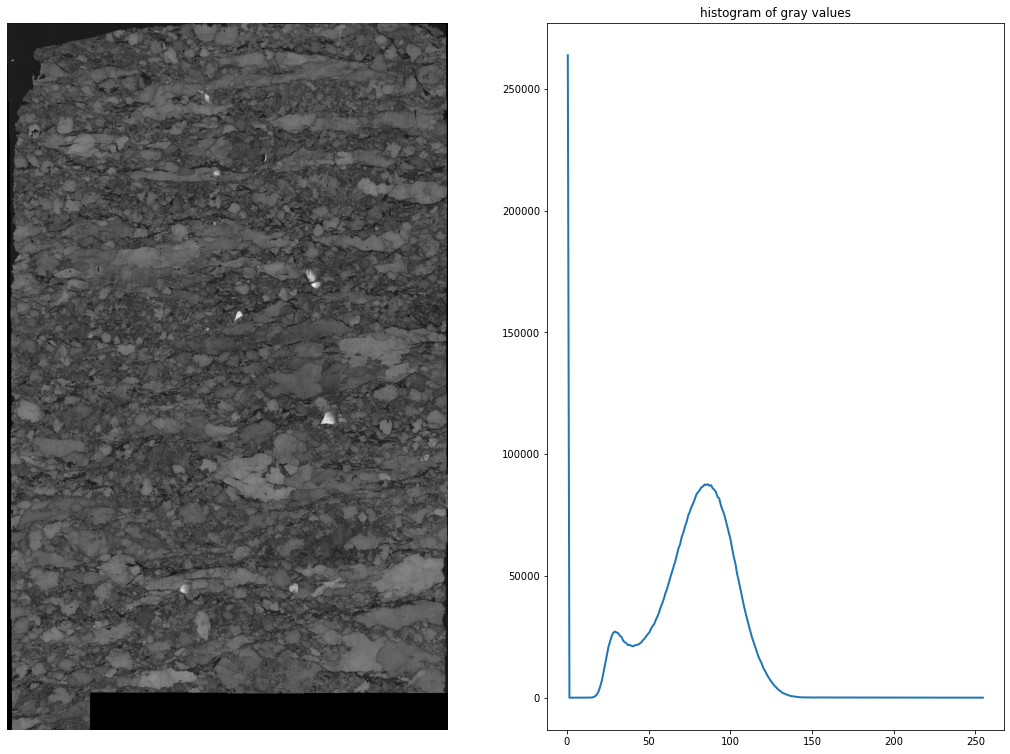

In [3]:
# Histogram of initial gray values
# 
# [10, 150] seems like a reasonable range for segmentation
# but results later seem less meaningful

hist, hist_centers = histogram(band_cont)

fig, axes = plt.subplots(1, 2, figsize=(18, 13))
axes[0].imshow(band_cont, cmap=plt.cm.gray)
axes[0].axis('off')
axes[1].plot(hist_centers, hist, lw=2)
axes[1].set_title('histogram of gray values')

In [5]:
# unsure why elevation map is not normalized.
elevation_map = sobel(band_cont)
# elevation_map /= elevation_map.max()
print(elevation_map.min(), elevation_map.max())

markers = np.zeros_like(band_cont)
markers[band_cont < 30] = 1
markers[band_cont > 150] = 2

print(band_cont.min(), band_cont.max())

segmentation_band_cont = watershed(elevation_map, markers)

0.0 131.67383946707105
0.0 255.0


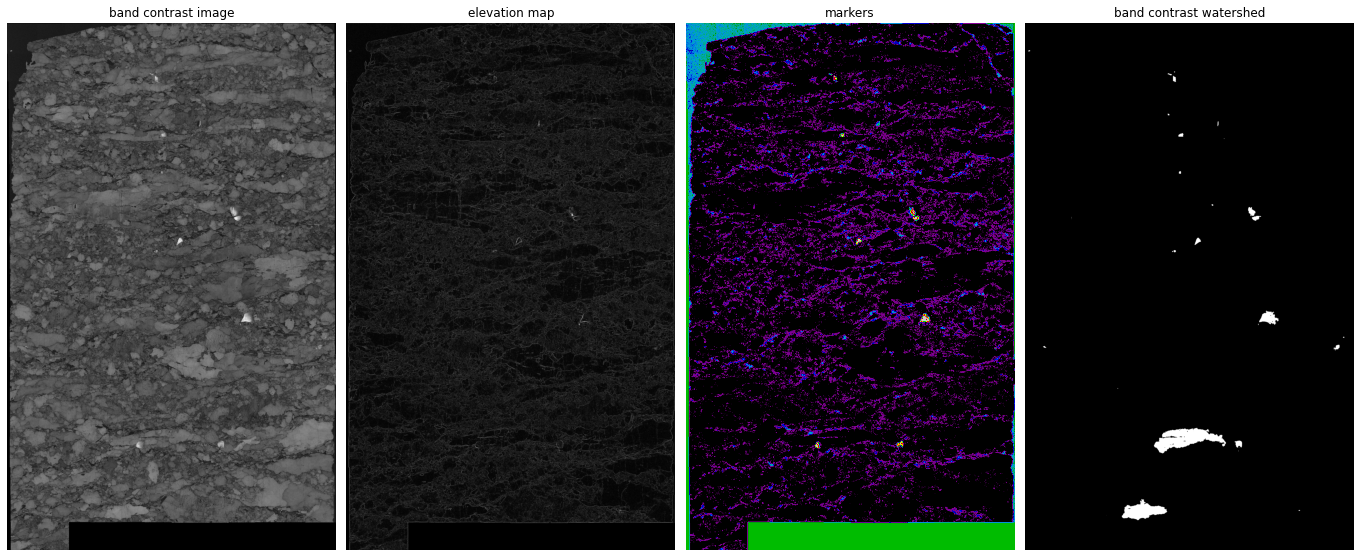

In [6]:
# watershed seems meaningless here
# preprocessing feels misled, 
# perhaps elevation map needs to be interpolated?
fig, axes = plt.subplots(ncols=4, figsize=(19, 13), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(band_cont, cmap=plt.cm.gray)
ax[0].set_title('band contrast image')
ax[1].imshow(elevation_map, cmap=plt.cm.gray)
ax[1].set_title('elevation map')
ax[2].imshow(markers, cmap=plt.cm.nipy_spectral)
ax[2].set_title('markers')
ax[3].imshow(segmentation_band_cont, cmap=plt.cm.gray)
ax[3].set_title('band contrast watershed')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

In [ ]:
segmentation_band_cont = ndi.binary_fill_holes(segmentation_band_cont - 1)
labeled_band_cont, _ = ndi.label(segmentation_band_cont)
image_label_overlay = label2rgb(labeled_band_cont, image=band_cont, bg_label=0)

fig, axes = plt.subplots(1, 2, figsize=(18, 13), sharey=True)
axes[0].imshow(band_cont, cmap=plt.cm.gray)
axes[0].contour(segmentation_band_cont, [0.5], linewidths=1.2, colors='y')
axes[1].imshow(image_label_overlay)

for a in axes:
    a.axis('off')

plt.tight_layout()

plt.show()